# News Mood Homework -- Aaron Eisenbarth

## Observation 1:

## Observation 2:

## Observation 3:

In [1]:
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "QNfqVUOAkw1qXDiApaMrDxz8R"
consumer_secret = "fb6GcNnA8kIn2745dWItBtAkiwis8me2nSLz5JQQW8YNDEa2W9"
access_token = "1850707158-Y29i1e5Kh6RwUtNznKEwttfCBokaXRY0qqWoGbN"
access_token_secret = "ybhtfHhR5ZLUPQgjUGPGoQbPPDYtWxYIdyPlUK93pzk8i"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
news_orgs = ['@BBC','@CBS','@CNN','@FoxNews','@nytimes']

In [3]:
test = api.user_timeline('@BBC')
print(json.dumps(test, sort_keys=True, indent=4, separators=(',', ': ')))

[
    {
        "contributors": null,
        "coordinates": null,
        "created_at": "Sun Dec 17 20:34:25 +0000 2017",
        "entities": {
            "hashtags": [
                {
                    "indices": [
                        22,
                        34
                    ],
                    "text": "BigThankYou"
                },
                {
                    "indices": [
                        69,
                        75
                    ],
                    "text": "SPOTY"
                }
            ],
            "symbols": [],
            "urls": [
                {
                    "display_url": "twitter.com/BBCSport/statu\u2026",
                    "expanded_url": "https://twitter.com/BBCSport/status/942491981758042112",
                    "indices": [
                        76,
                        99
                    ],
                    "url": "https://t.co/xRHVhwEjFP"
                }
            ],
            

In [4]:
tweet_text = []
org_text = []
date = []
for org in news_orgs:
    for x in range(6):
        public_tweets = api.user_timeline(org,page = x)
        for tweet in public_tweets:
            print(tweet['text'])
            print(tweet['created_at'])
            print(org)
            tweet_text.append(tweet['text'])
            date.append(tweet['created_at'])
            org_text.append(org)

Congratulations and a #BigThankYou to Denise. 🎉 What an inspiration. #SPOTY https://t.co/xRHVhwEjFP
Sun Dec 17 20:34:25 +0000 2017
@BBC
Follow the production of a contemporary performance of the nativity unlike any other. #Alternativity 9pm on @BBCTwo… https://t.co/RLZvnMA8yJ
Sun Dec 17 20:31:03 +0000 2017
@BBC
RT @BBCSport: .@NoelGallagher singing the Beatles 

Beautiful.

Watch #SPOTY live: https://t.co/J5Un4g5oDM https://t.co/flkmCR2TWw
Sun Dec 17 20:29:11 +0000 2017
@BBC
RT @BBCSport: The voting is open for #SPOTY.

It's time to have your say ➡️ https://t.co/DQf1YQT4L0 https://t.co/WvQYr12Ds7
Sun Dec 17 20:19:09 +0000 2017
@BBC
RT @BBCSport: It's time.

We know the contenders and now you can vote for your favourite.

Who do want to win #spoty? Vote here https://t.c…
Sun Dec 17 20:15:19 +0000 2017
@BBC
Congratulations to Phil Foden, BBC Young Sports Personality 2017. 🏆 #SPOTY https://t.co/NKYPBDxSpi
Sun Dec 17 20:00:41 +0000 2017
@BBC
🎬 How Frankenstein and his Creature conquered th

In [5]:
df = pd.DataFrame(
    {'org_text': org_text,
     'tweet_text': tweet_text,
     'date': date
    })
df.head()

,date,org_text,tweet_text
0,Sun Dec 17 20:34:25 +0000 2017,@BBC,Congratulations and a #BigThankYou to Denise. ...
1,Sun Dec 17 20:31:03 +0000 2017,@BBC,Follow the production of a contemporary perfor...
2,Sun Dec 17 20:29:11 +0000 2017,@BBC,RT @BBCSport: .@NoelGallagher singing the Beat...
3,Sun Dec 17 20:19:09 +0000 2017,@BBC,RT @BBCSport: The voting is open for #SPOTY.\n...
4,Sun Dec 17 20:15:19 +0000 2017,@BBC,RT @BBCSport: It's time.\n\nWe know the conten...


In [6]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through all tweets
for index, row in df.iterrows():

# Run Vader Analysis on each tweet
    df.set_value(index, 'compound', analyzer.polarity_scores(row["tweet_text"])["compound"])
    df.set_value(index, 'pos', analyzer.polarity_scores(row["tweet_text"])["pos"])
    df.set_value(index, 'neu', analyzer.polarity_scores(row["tweet_text"])["neu"])
    df.set_value(index, 'neg', analyzer.polarity_scores(row["tweet_text"])["neg"])

# Add each value to the appropriate list
    #compound_list.append(compound)
    #positive_list.append(pos)
    #negative_list.append(neg)
    #neutral_list.append(neu)
        
#compound_avg = np.mean(compound_list)
df.head()

,date,org_text,tweet_text,compound,pos,neu,neg
0,Sun Dec 17 20:34:25 +0000 2017,@BBC,Congratulations and a #BigThankYou to Denise. ...,0.8074,0.477,0.523,0.0
1,Sun Dec 17 20:31:03 +0000 2017,@BBC,Follow the production of a contemporary perfor...,0.0000,0.000,1.000,0.0
2,Sun Dec 17 20:29:11 +0000 2017,@BBC,RT @BBCSport: .@NoelGallagher singing the Beat...,0.5994,0.262,0.738,0.0
3,Sun Dec 17 20:19:09 +0000 2017,@BBC,RT @BBCSport: The voting is open for #SPOTY.\n...,0.0000,0.000,1.000,0.0
4,Sun Dec 17 20:15:19 +0000 2017,@BBC,RT @BBCSport: It's time.\n\nWe know the conten...,0.6249,0.181,0.819,0.0


In [7]:
df2 = df.sort_values(by=['org_text','date'],ascending=[True, False])
df2['Tweets Ago'] = df2.groupby(['org_text'])['date'].rank(method='dense',ascending=True)
    
#df2.to_csv('test.csv')

In [8]:
for index, i in df2.iterrows():
    if i['org_text'] == '@BBC':
        df2.set_value(index, 'org', 'BBC') 
    elif i['org_text'] == '@nytimes':
        df2.set_value(index, 'org', 'New York Times') 
    elif i['org_text'] == '@CNN':
        df2.set_value(index, 'org', 'CNN')
    elif i['org_text'] == '@FoxNews':
        df2.set_value(index, 'org', 'Fox News')
    elif i['org_text'] == '@CBS':
        df2.set_value(index, 'org', 'CBS')
                      #print(df2['org'].unique())
#print(type(df2['org']))

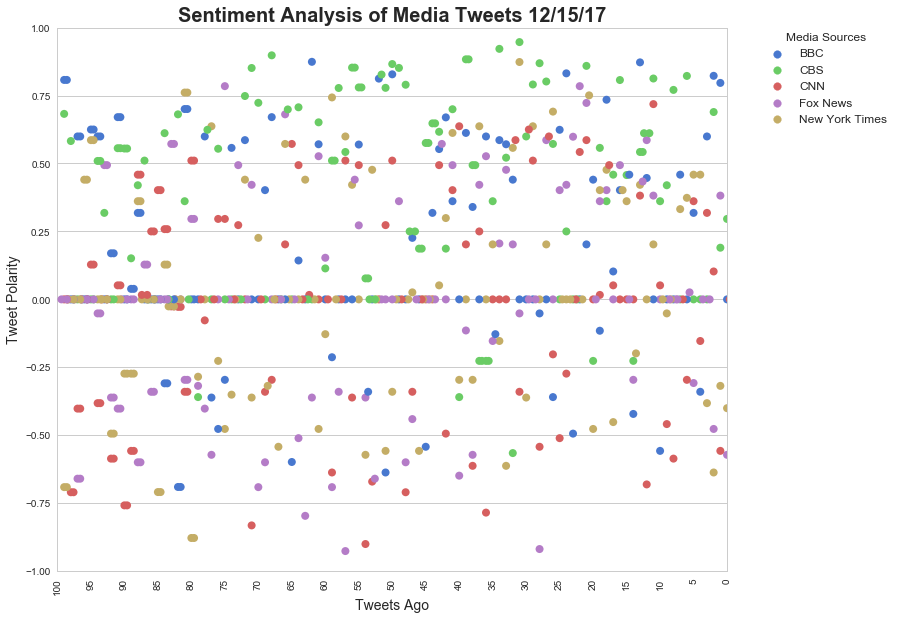

In [33]:
plt.clf()
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 10))
# # Incorporate the other graph properties
ax = sns.swarmplot(x = 'Tweets Ago',
                   y = 'compound',
                   data = df2,
                   hue = df2['org'],
                  size = 8)
plt.title("Sentiment Analysis of Media Tweets 12/15/17" ,size=20,weight='bold')
plt.legend(title='Media Sources',fontsize = 12,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(100,0)
plt.ylim(-1,1)
plt.xlabel('Tweets Ago', size = 14)
plt.ylabel('Tweet Polarity', size = 14)

x_labels = [0]
adjust = 5
start = 0 
for x in range(20):
    x_labels.append(start + adjust)
    start += adjust

plt.xticks(x_labels,x_labels,rotation='vertical')


# # Save the figure
plt.savefig("Media Sentiment Scatter.png")

# # Show plot
plt.show()

In [10]:
df_pivot = pd.pivot_table(df2
                              ,index=['org']
                              ,values = ['compound','pos','neu','neg']
                              ,aggfunc='mean')
df_pivot = df_pivot.reset_index()
df_pivot.head()

,org,compound,neg,neu,pos
0,BBC,0.176057,0.038567,0.853000,0.108400
1,CBS,0.381163,0.011608,0.828258,0.160150
2,CNN,-0.026757,0.086800,0.841975,0.071208
3,Fox News,-0.010037,0.077983,0.860867,0.061133
4,New York Times,0.016871,0.079692,0.828825,0.091483


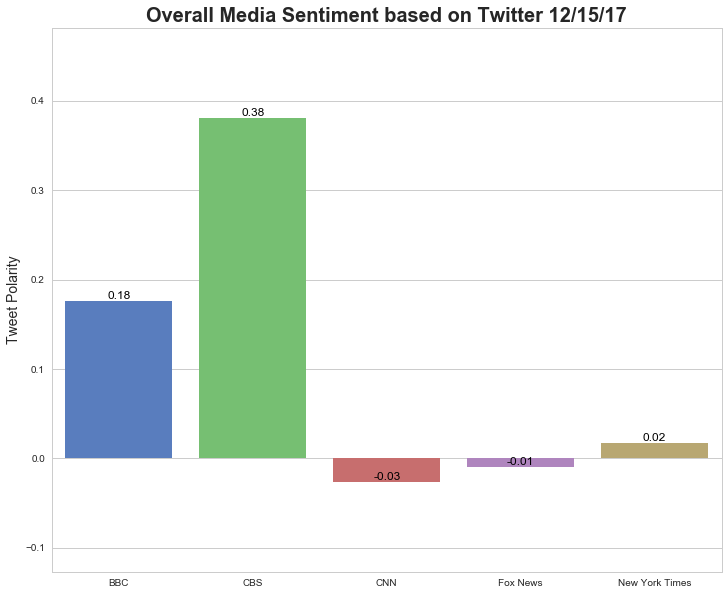

In [32]:
plt.clf()
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 10))
# # Incorporate the other graph properties
total = float(len(df_pivot['org']))
ax = sns.barplot(x = 'org',
                   y = 'compound',
                   data = df_pivot
                  # hue = df2['org'],
                  # size = 8
                )

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.title("Overall Media Sentiment based on Twitter 12/15/17" ,size=20,weight='bold')
#plt.legend(title='Media Sources',fontsize = 12,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-.5,4.5)
plt.ylim(df_pivot['compound'].min() -.1,df_pivot['compound'].max() +.1)
plt.xlabel('', size = 14)
plt.ylabel('Tweet Polarity', size = 14)

#plt.xticks(x_labels,x_labels,rotation='vertical')


# # Save the figure
plt.savefig("Overall Media Sentiment.png")

# # Show plot
plt.show()